# __Humidity Predictor__

In [1]:
import glob, numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns

# Training files
files = glob.glob('../data/WHT_data/WHT_weather_set_parts_*')
files = sorted(files)
WHT_parts = [pd.read_csv(file_path) for file_path in files]

# Concatenate the DataFrames into a single training set
WHT_data = pd.concat(WHT_parts, ignore_index=True)

/tmp/ipykernel_8344/3604653322.py:6: DtypeWarning: Columns (1,3) have mixed types. Specify dtype option on import or set low_memory=False.
  WHT_parts = [pd.read_csv(file_path) for file_path in files]
/tmp/ipykernel_8344/3604653322.py:6: DtypeWarning: Columns (2,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  WHT_parts = [pd.read_csv(file_path) for file_path in files]
/tmp/ipykernel_8344/3604653322.py:6: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  WHT_parts = [pd.read_csv(file_path) for file_path in files]
/tmp/ipykernel_8344/3604653322.py:6: DtypeWarning: Columns (1,2,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  WHT_parts = [pd.read_csv(file_path) for file_path in files]
/tmp/ipykernel_8344/3604653322.py:6: DtypeWarning: Columns (2,5) have mixed types. Specify dtype option on import or set low_memory=False.
  WHT_parts = [pd.read_csv(file_path) for file_pa

In [2]:
WHT_data['sampletime'] = pd.to_datetime(WHT_data['sampletime'])

# Extract year
WHT_data['year'] = WHT_data['sampletime'].dt.year

# Extract month
WHT_data['month'] = WHT_data['sampletime'].dt.month

# Extract day
WHT_data['day'] = WHT_data['sampletime'].dt.day

# Extract hour
WHT_data['hour'] = WHT_data['sampletime'].dt.hour

# Extract minute
WHT_data['minute'] = WHT_data['sampletime'].dt.minute

# Extract second
WHT_data['second'] = WHT_data['sampletime'].dt.second

# Drop the 'sampletime' column
WHT_data.drop(columns=['sampletime'], inplace=True)

WHT_data.head()

,windspeed,airtemperature,relativehumidity,localwetness,localbattery,winddirection,airpressure,dewpoint,year,month,day,hour,minute,second
0,7.1742,9.3159,32.342,-0.025,11.995,NaN,NaN,NaN,2020,1,31,16,59,31
1,6.7829,9.322,32.324,-0.025,11.994,NaN,NaN,NaN,2020,1,31,16,59,37
2,7.0003,9.3159,32.36,-0.025,11.995,NaN,NaN,NaN,2020,1,31,16,59,43
3,7.2612,9.3159,32.434,-0.025,11.994,NaN,NaN,NaN,2020,1,31,16,59,49
4,6.9134,9.3159,32.489,-0.025,11.994,NaN,NaN,NaN,2020,1,31,16,59,55


In [3]:
# Convert the numeric values into float32
# We need to convert each category into float32
columns = WHT_data.columns

# There are some missing values with '\\N' in the variables. Let's transform into an arbitrary number
for ii in columns:
    WHT_data[ii][WHT_data[ii] == '\\N'] = -1
    # Converting into float32
    WHT_data[ii] = WHT_data[ii].astype('float32')

# Displaying the type of each column
print(WHT_data.dtypes)
print('\n')

# Now we can count the number of NaNs in each category
print(WHT_data.isna().sum())

/tmp/ipykernel_8344/2924672293.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  WHT_data[ii][WHT_data[ii] == '\\N'] = -1
/tmp/ipykernel_8344/2924672293.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  WHT_data[ii][WHT_data[ii] == '\\N'] = -1
/tmp/ipykernel_8344/2924672293.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  WHT_data[ii][WHT_data[ii] == '\\N'] = -1
/tmp/ipykernel_8344/2924672293.py:7: SettingWithCopyWarning: 
A val

windspeed           float32
airtemperature      float32
relativehumidity    float32
localwetness        float32
localbattery        float32
winddirection       float32
airpressure         float32
dewpoint            float32
year                float32
month               float32
day                 float32
hour                float32
minute              float32
second              float32
dtype: object


windspeed                 0
airtemperature            0
relativehumidity          0
localwetness        6334884
localbattery        6334884
winddirection       5557582
airpressure         5557582
dewpoint            5557582
year                      0
month                     0
day                       0
hour                      0
minute                    0
second                    0
dtype: int64


/tmp/ipykernel_8344/2924672293.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  WHT_data[ii][WHT_data[ii] == '\\N'] = -1
/tmp/ipykernel_8344/2924672293.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  WHT_data[ii][WHT_data[ii] == '\\N'] = -1
/tmp/ipykernel_8344/2924672293.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  WHT_data[ii][WHT_data[ii] == '\\N'] = -1
/tmp/ipykernel_8344/2924672293.py:7: SettingWithCopyWarning: 
A val

In [4]:
# Deleting the columns with more than 30% of NaNs

dim = len(WHT_data) # Dimension of the DataFrame

for ii in columns:
    nans = WHT_data[ii].isna().sum()*100/dim
    # Applying the condition over the column
    if nans > 30:
        WHT_data.drop(ii, axis=1, inplace=True)

In [5]:
#def split_and_save(set, name, num_parts = 4):
    # Splitting the dataset set into n-parts
#    split_indices = [i * len(set) // num_parts for i in range(1, num_parts)]
#    tt_set_parts = np.split(set, split_indices)
    
    # Saving each part into a separate file
#    for i, part in enumerate(tt_set_parts):
#        part.to_csv(f'../data/data_cleaned/{name}_set_parts_{i + 1}.csv', index=False)

#split_and_save(WHT_data, 'cleaned_forecast', num_parts = 15)

In [5]:
# Constraining to data from 2023 for better performance as the whole data devours my RAM...
WHT_data = WHT_data[WHT_data.year >= 2023]

## Data Visualization

#### Mean temperature, humidity and wind speed by month

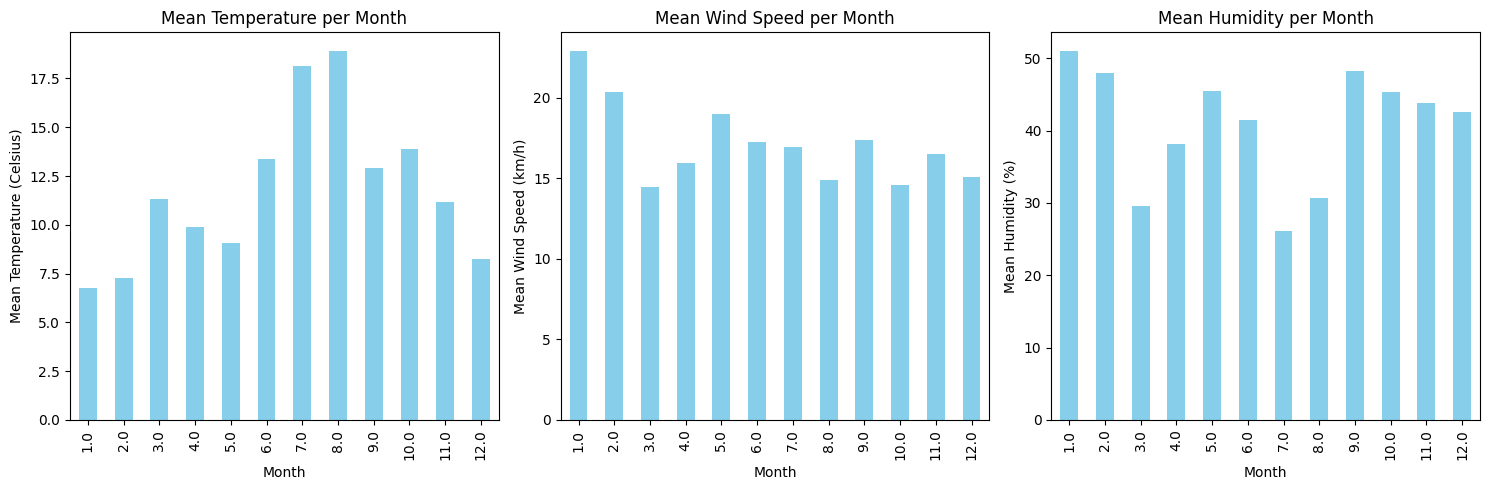

In [6]:
# Group by month and calculate mean temperature
mean_temp_per_month = WHT_data.groupby('month')['airtemperature'].mean()
mean_wind_per_month = WHT_data.groupby('month')['windspeed'].mean()
mean_humi_per_month = WHT_data.groupby('month')['relativehumidity'].mean()

fig, ax = plt.subplots(1,3,figsize=(15,5))
ax = ax.ravel()

# Plotting the mean temperature per month
mean_temp_per_month.plot(kind='bar', color='skyblue', ax=ax[0])
mean_wind_per_month.plot(kind='bar', color='skyblue', ax=ax[1])
mean_humi_per_month.plot(kind='bar', color='skyblue', ax=ax[2])

ax[0].set_title('Mean Temperature per Month'); ax[1].set_title('Mean Wind Speed per Month'); ax[2].set_title('Mean Humidity per Month')
ax[0].set_xlabel('Month'); ax[1].set_xlabel('Month'); ax[2].set_xlabel('Month')
ax[0].set_ylabel('Mean Temperature (Celsius)'); ax[1].set_ylabel('Mean Wind Speed (km/h)'); ax[2].set_ylabel('Mean Humidity (%)')
#plt.xticks(rotation=45, ax=ax[0])  # Rotate x-axis labels for better readability
#ax[0].set_grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### Correlation map

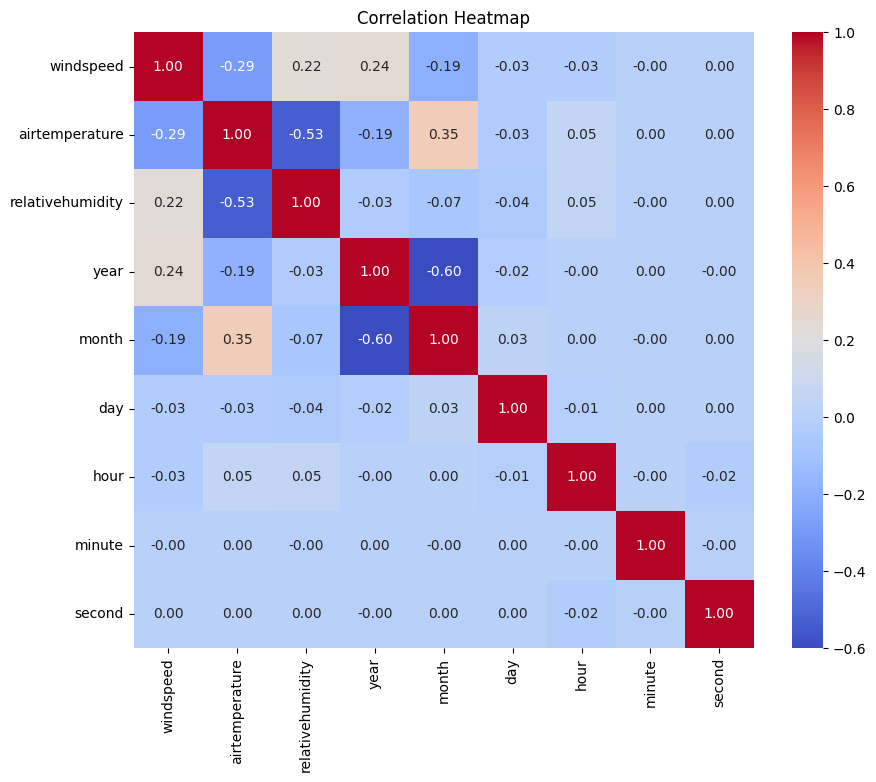

In [7]:
# Assuming combined is your DataFrame
correlation_matrix = WHT_data.corr()

# Plotting the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap')
plt.show()

In [8]:
# Discarding the variables with very small correlation close to 0 (or equal to 0)
WHT_data.drop(['second', 'minute'], axis=1, inplace=True)

## Machine Learning models

In [9]:
from sklearn import model_selection, preprocessing
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate, train_test_split
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [10]:
target = WHT_data.relativehumidity
data   = WHT_data.drop(columns='relativehumidity')

In [11]:
scaler = preprocessing.MinMaxScaler().fit(data)
data[data.columns] = pd.DataFrame(scaler.transform(data), index= data.index)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state= 101)

### Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=500, random_state=0, n_jobs=10)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

In [ ]:
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared (R2)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

### Polynomial regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

def polynomial_regression(X_train, y_train, X_test, y_test, degree):
    # Transformación polinómica de los conjuntos de entrenamiento y prueba
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    # Entrenamiento del modelo de regresión lineal
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    # Predicciones en los conjuntos de entrenamiento y prueba
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)
    
    # Cálculo de las métricas
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    
    return mae_train, mae_test, mse_train, mse_test, r2_train, r2_test
    
# Lista de grados del polinomio a probar
degrees = range(1, 8)  # Puedes ajustar este rango según lo desees

# Listas para almacenar las métricas
mse_train_list = []
mae_train_list = []
r2_train_list = []

for degree in degrees:
    # Llamada a la función para cada grado del polinomio
    mae_train, _, mse_train, _, r2_train, _ = polynomial_regression(X_train, y_train, X_test, y_test, degree)
    mse_train_list.append(mse_train)
    r2_train_list.append(r2_train)

# Graficar MSE
plt.plot(degrees, mse_train_list, label='MSE', marker='o')
plt.xlabel('Grado del polinomio')
plt.ylabel('MSE')
plt.title('MSE para distintos grados del polinomio')
plt.legend()
plt.show()

# Graficar MAE
plt.plot(degrees, mae_train_list, label='MAE', marker='o')
plt.xlabel('Grado del polinomio')
plt.ylabel('MAE')
plt.title('MAE para distintos grados del polinomio')
plt.legend()
plt.show()

# Graficar R2
plt.plot(degrees, r2_train_list, label='R2', marker='o')
plt.xlabel('Grado del polinomio')
plt.ylabel('R2')
plt.title('R2 para distintos grados del polinomio')
plt.legend()
plt.show()

### Dense Neural Network

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Design the neural network model
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1)  # Output layer with single neuron for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Re-scaling also the target variable for performance imrpovements
# Crear y ajustar el MinMaxScaler para la variable objetivo
scaler_y = preprocessing.MinMaxScaler()

# Training set
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))

# Train the model
history = model.fit(X_train, y_train_scaled, epochs=20, batch_size=32, validation_split=0.2)

# Evaluate the model on test data
loss, mae = model.evaluate(X_test, y_test_scaled)
print("Mean Squared Error (MSE):", loss)
print("Mean Absolute Error (MAE):", mae)

Epoch 1/20
31658/31658 [==============================] - 24s 748us/step - loss: 0.0166 - mae: 0.0925 - val_loss: 0.0097 - val_mae: 0.0701
Epoch 2/20
31658/31658 [==============================] - 24s 744us/step - loss: 0.0082 - mae: 0.0642 - val_loss: 0.0070 - val_mae: 0.0598
Epoch 3/20
31658/31658 [==============================] - 24s 754us/step - loss: 0.0063 - mae: 0.0559 - val_loss: 0.0062 - val_mae: 0.0553
Epoch 4/20
31658/31658 [==============================] - 24s 754us/step - loss: 0.0053 - mae: 0.0510 - val_loss: 0.0047 - val_mae: 0.0487
Epoch 5/20
31658/31658 [==============================] - 24s 744us/step - loss: 0.0047 - mae: 0.0480 - val_loss: 0.0045 - val_mae: 0.0469
Epoch 6/20
31658/31658 [==============================] - 24s 743us/step - loss: 0.0043 - mae: 0.0457 - val_loss: 0.0039 - val_mae: 0.0432
Epoch 7/20
31658/31658 [==============================] - 24s 751us/step - loss: 0.0039 - mae: 0.0438 - val_loss: 0.0038 - val_mae: 0.0427
Epoch 8/20
31658/31658 [===

9894/9894 [==============================] - 4s 431us/step


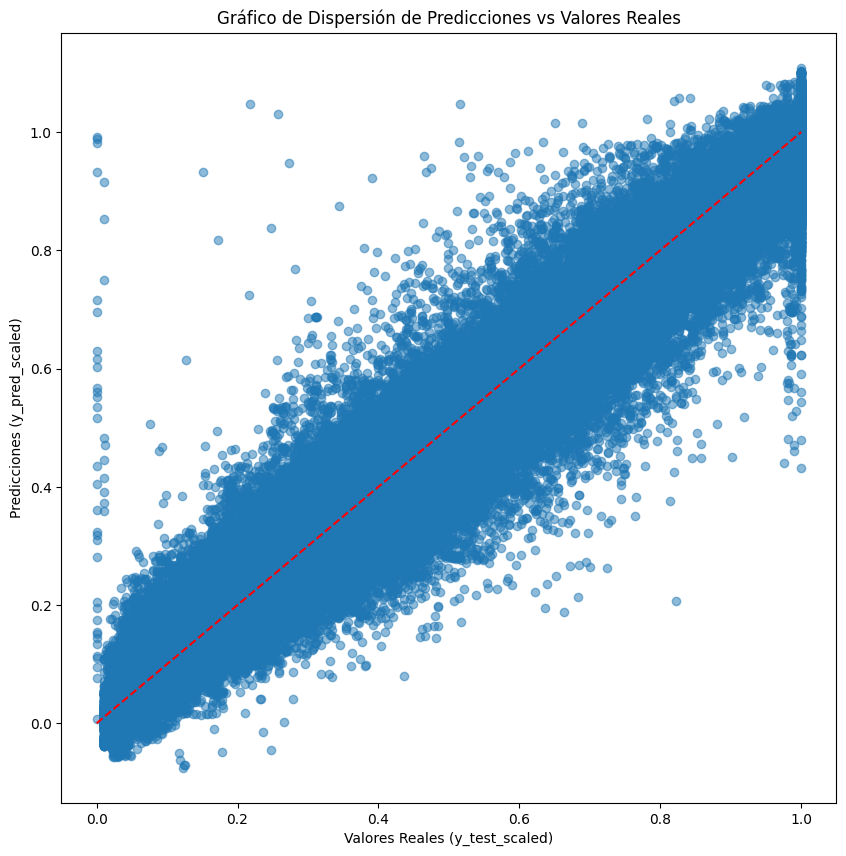

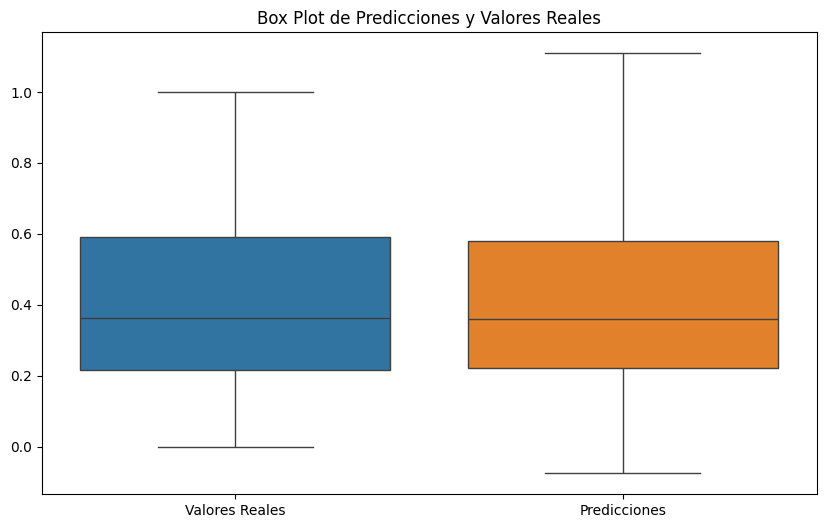

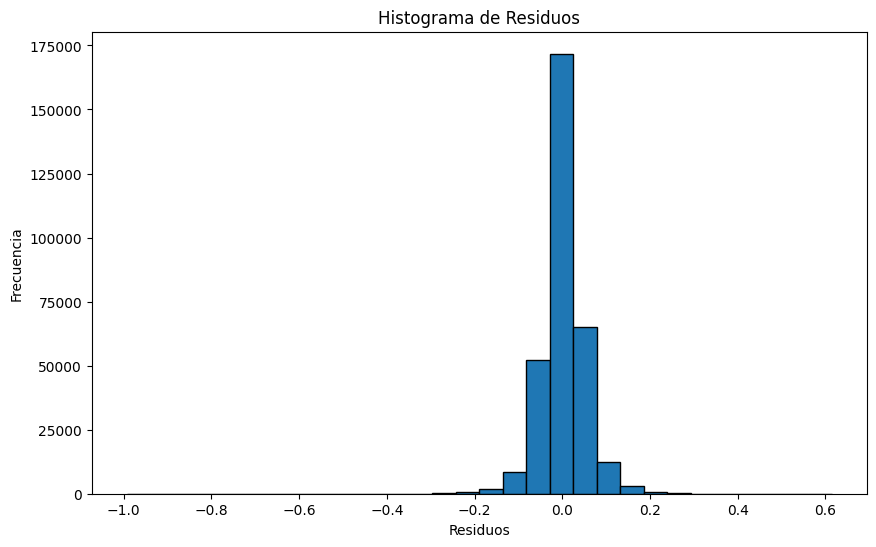

In [26]:
# Applying the DNN over the testing set
y_pred = model.predict(X_test)

# Gráfico de dispersión
plt.figure(figsize=(10,10))
plt.scatter(y_test_scaled, y_pred, alpha=0.5)
plt.plot([min(y_test_scaled), max(y_test_scaled)], [min(y_test_scaled), max(y_test_scaled)], color='red', linestyle='--')
plt.xlabel('Valores Reales (y_test_scaled)')
plt.ylabel('Predicciones (y_pred_scaled)')
plt.title('Gráfico de Dispersión de Predicciones vs Valores Reales')
plt.show()

# Boxplot de datos predecidos vs datos reales
import seaborn as sns

# Crear un DataFrame para las comparaciones
df_comparacion = pd.DataFrame({
    'Valores Reales': y_test_scaled.flatten(),
    'Predicciones': y_pred.flatten()
})

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_comparacion)
plt.title('Box Plot de Predicciones y Valores Reales')
plt.show()

residuos = y_test_scaled - y_pred

# Histograma de residuos
plt.figure(figsize=(10, 6))
plt.hist(residuos, bins=30, edgecolor='k')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.title('Histograma de Residuos')
plt.show()

## Time Series

In [5]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.tsa.seasonal import seasonal_decompose
import datetime, joblib
import statsmodels.api as sm
from itertools import product

In [6]:
# Usamos solo los datos desde 2023
data = WHT_data[WHT_data['year'] >= 2023]

# Convierte las columnas a tipo entero
data[['year', 'month', 'day', 'hour', 'minute', 'second']] = data[['year', 'month', 'day', 'hour', 'minute', 'second']].astype(int)

# Crea la nueva columna datetime
data['datetime'] = pd.to_datetime(data[['year', 'month', 'day', 'hour', 'minute', 'second']])

# Elimina las columnas originales si ya no son necesarias
data = data.drop(columns=['year', 'month', 'day', 'hour', 'minute', 'second'])

# Opcional: reordena las columnas para tener datetime al principio
cols = ['datetime'] + [col for col in data.columns if col != 'datetime']
data = data[cols]

# Dado que vamos a calcular series temporales de humedad, eliminamos las columnas windspeed y airtemperature
data.drop(['windspeed', 'airtemperature'], axis=1, inplace=True)

print(data.head())

/tmp/ipykernel_8344/1054904895.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['year', 'month', 'day', 'hour', 'minute', 'second']] = data[['year', 'month', 'day', 'hour', 'minute', 'second']].astype(int)
/tmp/ipykernel_8344/1054904895.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['datetime'] = pd.to_datetime(data[['year', 'month', 'day', 'hour', 'minute', 'second']])


                   datetime  relativehumidity
7534671 2023-01-01 00:00:40         86.900002
7534672 2023-01-01 00:01:10         86.500000
7534673 2023-01-01 00:01:40         86.800003
7534674 2023-01-01 00:02:10         86.800003
7534675 2023-01-01 00:02:40         86.099998


### Humidity representation

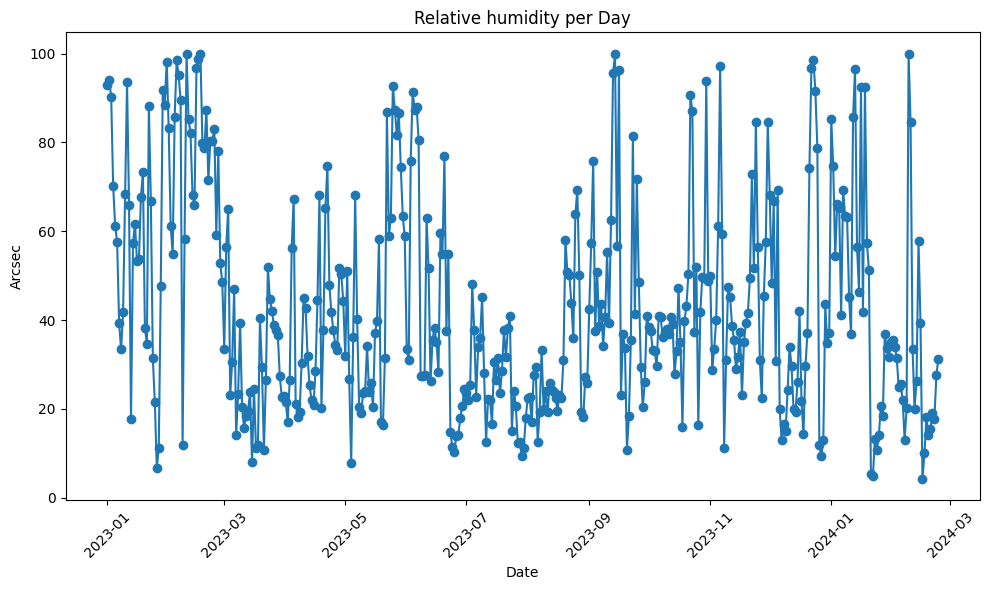

In [8]:
# Convertimos datetime a index
data.index = data.datetime

# Eliminamos la columna datetime
data.drop('datetime', axis=1, inplace=True)

# Resample para agrupar los datos por semana y calcular la media
data_weekly = data.resample('D').mean()

# Plot
plt.figure(figsize=(10, 6))
plt.plot(data_weekly.index, data_weekly['relativehumidity'], marker='o')
plt.xlabel('Date')
plt.ylabel('Arcsec')
plt.title('Relative humidity per Day')
plt.xticks(rotation=45)  # Rotar las fechas para que sean legibles
plt.tight_layout()
plt.show()

### 1. Seasonal decomposition

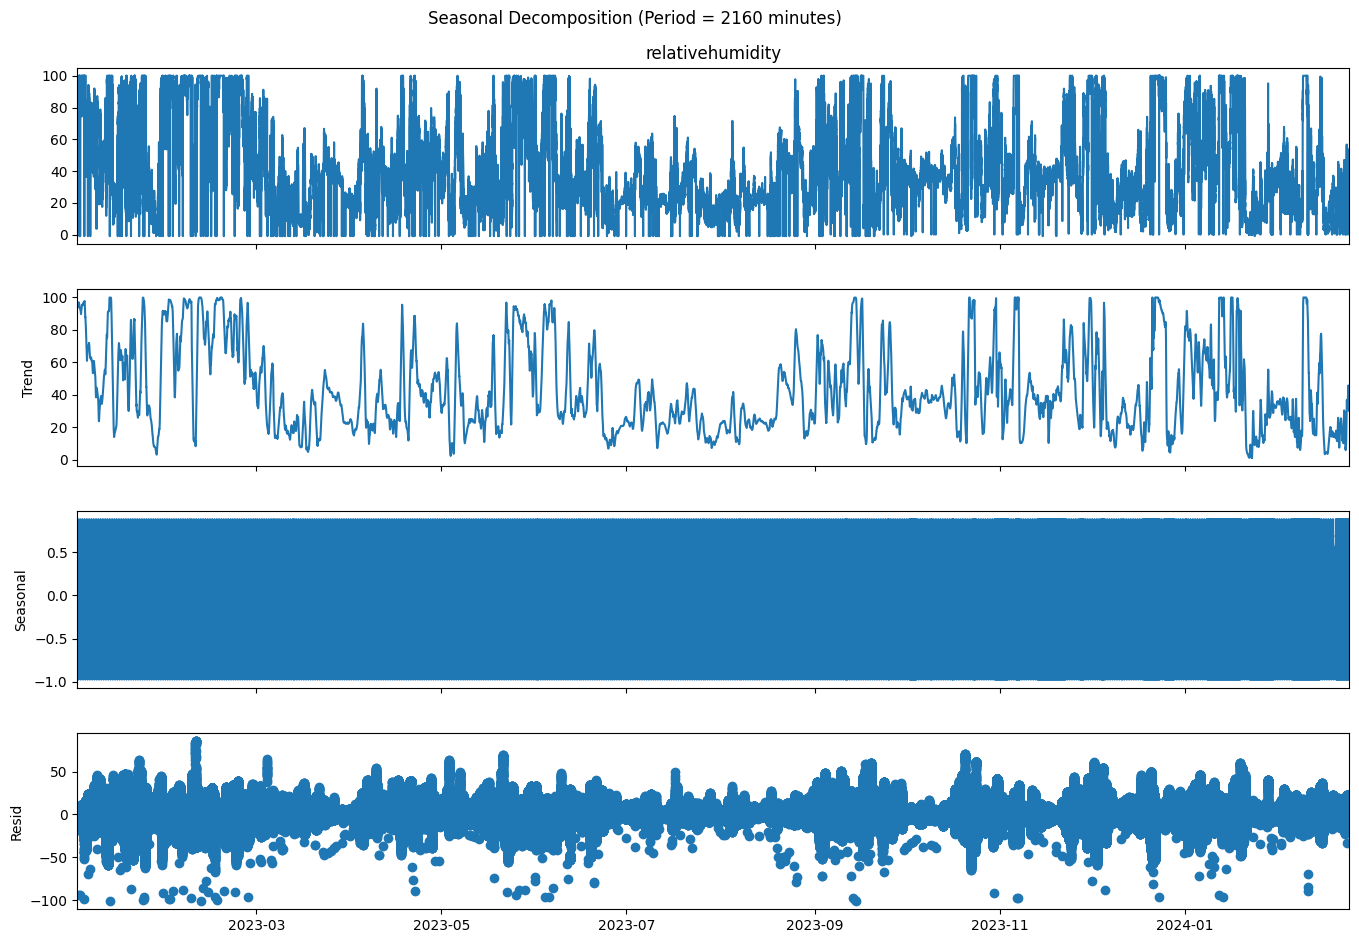

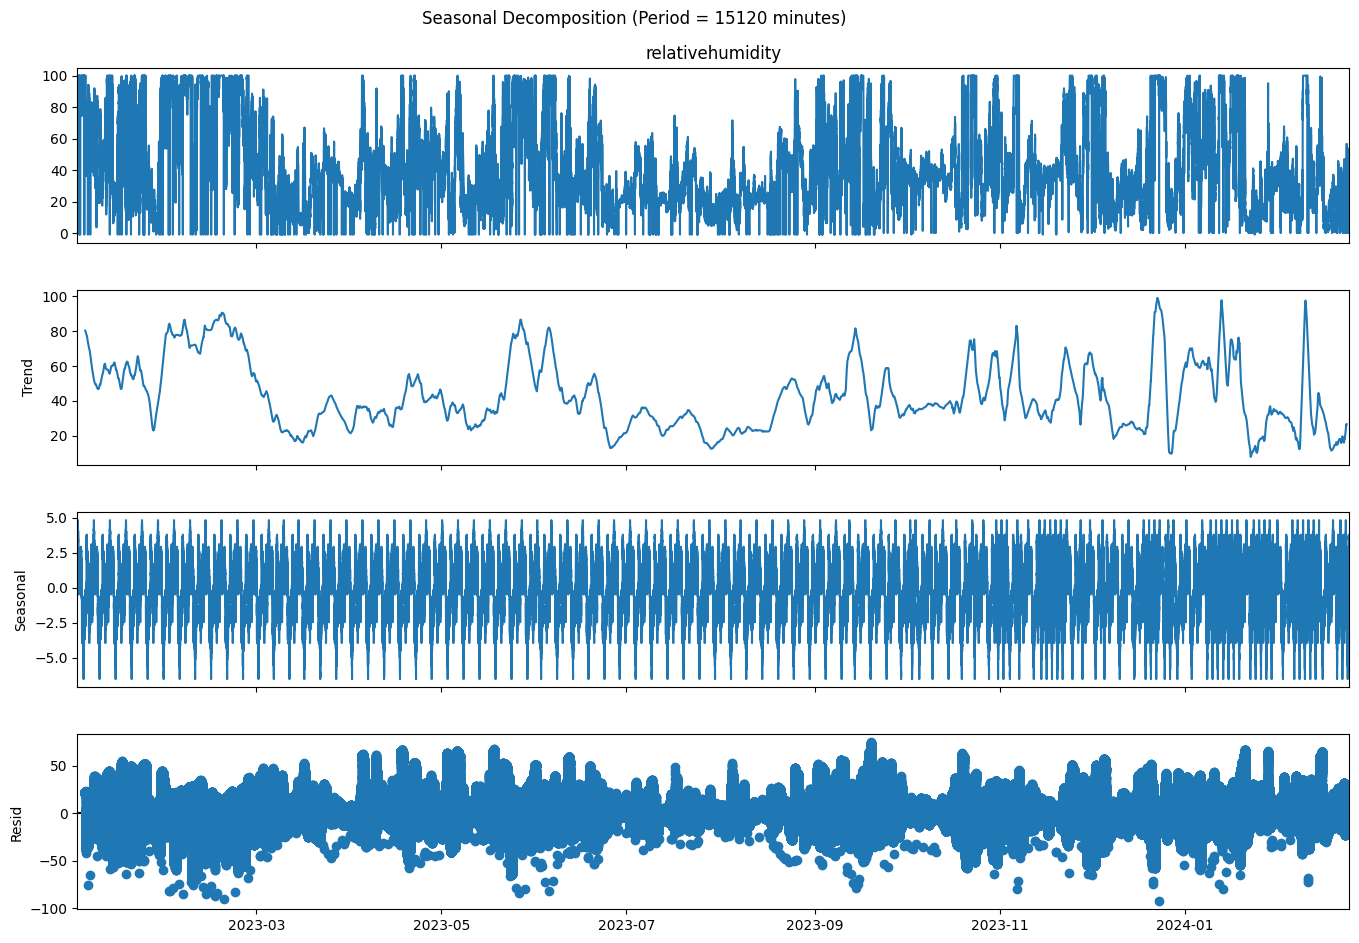

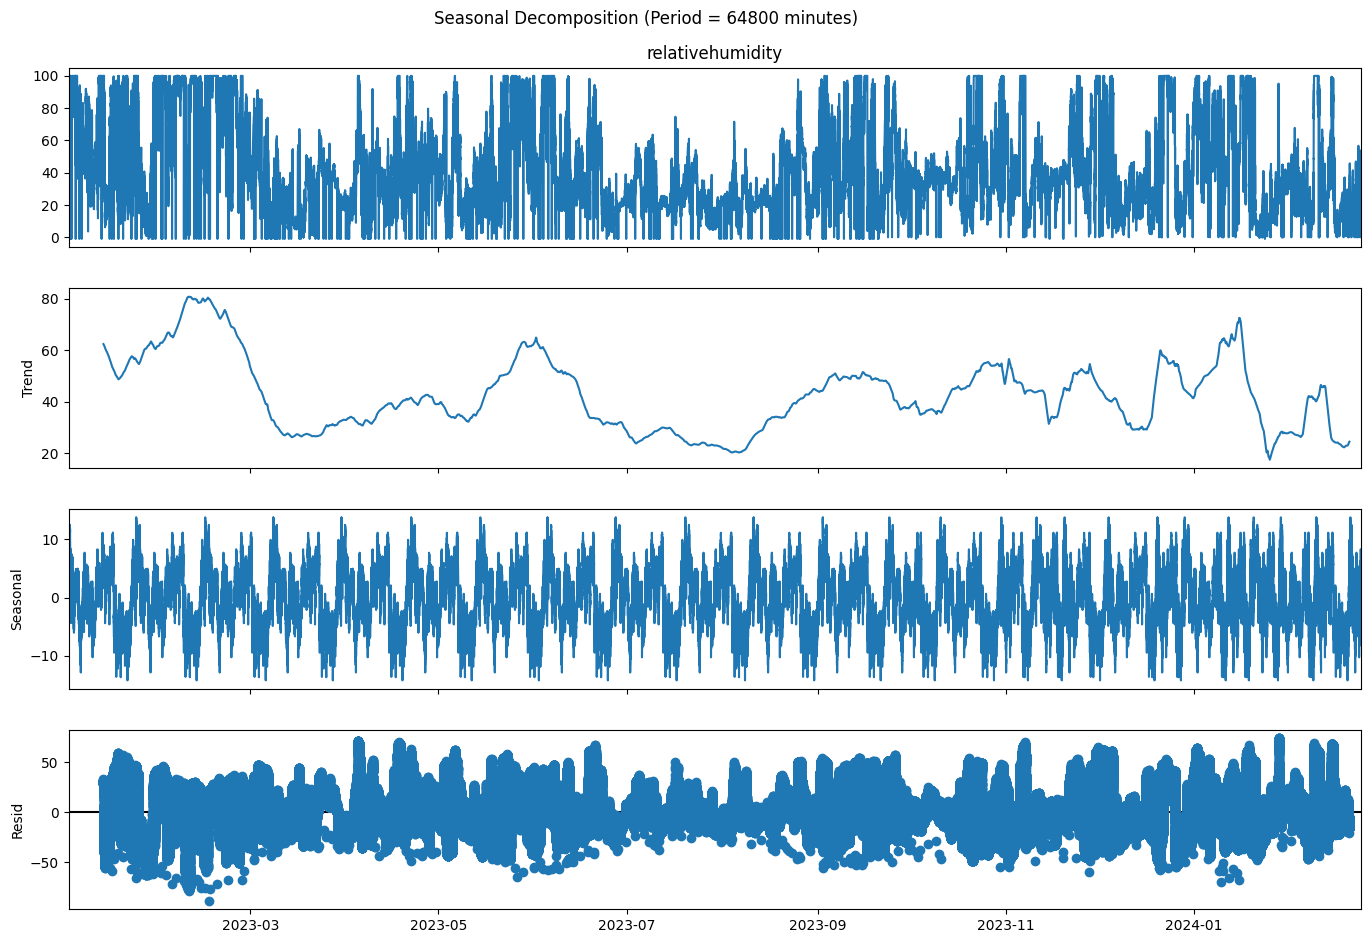

In [83]:
# Prueba con periodos diferentes: 1440 para un día y 10080 para una semana
# Obtenemos datos de humedad cada 40 segundos aproximádamente, esto implica lo siguiente:
# - Día completo (24 horas): 24×60×60/40=2160 puntos de datos (ya que hay 2160 intervalos de 40 segundos en un día).
# - Semana (7 días): 7×24×60×60/40=15120 puntos de datos.
# - Mes (30 días): 30x24x60x60/40=64800 puntos de datos.
periods = [2160, 15120, 64800]

for period in periods:
    decomposition = seasonal_decompose(data_cleaned, period=period, model='additive')
    fig = decomposition.plot()
    fig.set_size_inches(15, 10)
    fig.suptitle(f'Seasonal Decomposition (Period = {period} minutes)')
    plt.show()

### 2. Autocorrelation analysis

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x70c613a8ad30> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

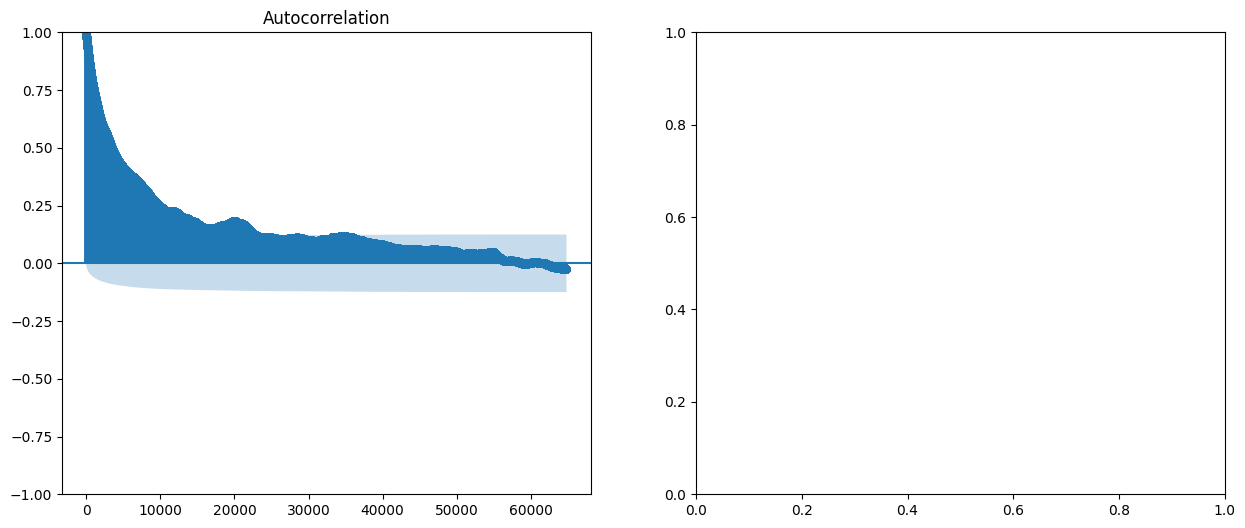

In [7]:
# Eliminar los valores NaN si los hay
data_cleaned = data['relativehumidity'].dropna()

fig, ax = plt.subplots(1,2,figsize=(15, 6))
ax = ax.ravel()
plot_acf(data_cleaned, lags=64800, ax=ax[0])  # 64800 lags for a month
plot_pacf(data_cleaned, lags=64800, ax=ax[1])
ax[0].set_xlabel('Lags'); ax[1].set_xlabel('Lags')
ax[0].set_ylabel('Autocorrelation')
ax[0].set_title('Autocorrelation Plot of Relative Humidity')
ax[1].set_title('Partial Autocorrelation Plot of Relative Humidity')
plt.show()

In [ ]:
# De la decomposición y el gráfico de autocorrelación obtenemos que la seasonality es 64800, ya que la humedad se muestrea cada 40 segundos y varía cada mes
season = 64800

### 3. Periodgram with Fourier transformations

Text(0.5, 1.0, 'Periodogram')

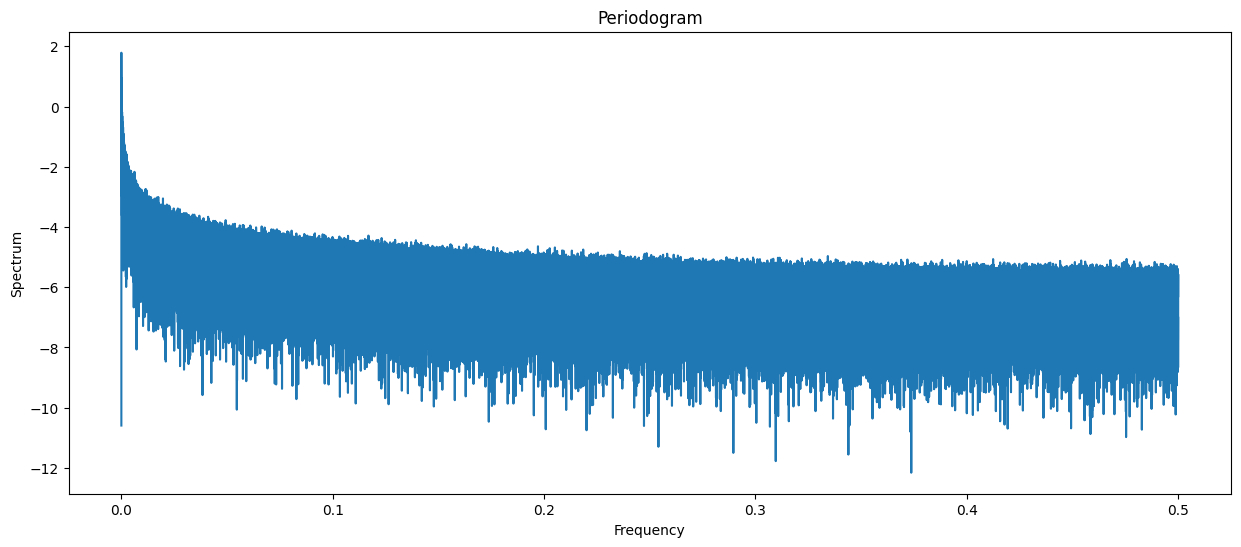

In [41]:
from scipy.signal import periodogram

frequencies, spectrum = periodogram(data_cleaned, scaling='spectrum')

plt.figure(figsize=(15, 6))
plt.plot(frequencies, np.log10(spectrum))
plt.xlabel('Frequency')
plt.ylabel('Spectrum')
plt.title('Periodogram')

### 4. Seasonal AutoRegressive Integrated Moving Average with eXogenous regressors (SARIMAX) model

In [ ]:
import statsmodels.api as sm

# Reducir los datos a una muestra más manejable, por ejemplo, tomar una muestra del 10%
sampled_data = data_cleaned.sample(frac=0.1, random_state=42).sort_index()

# Recalcular el tamaño de entrenamiento y prueba
train_size = int(len(sampled_data) * 0.8)
train, test = sampled_data[:train_size], sampled_data[train_size:]

# Ajustar el modelo SARIMAX
seasonal_order = (0, 0, 1, season)  # Ejemplo de orden estacional
order = (0, 0, 0)  # Ejemplo de orden no estacional

model = sm.tsa.SARIMAX(train, order=order, seasonal_order=seasonal_order)
model_fit = model.fit(disp=False)
print(model_fit.summary())

/home/pablo/anaconda3/envs/ml_env_linux/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/pablo/anaconda3/envs/ml_env_linux/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
# Predicción en el conjunto de prueba
predictions = model_fit.forecast(steps=len(test))

# Gráfico de las predicciones vs los valores reales
plt.figure(figsize=(15, 6))
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, predictions, label='Predicted', color='red')
plt.xlabel('Time')
plt.ylabel('Relative Humidity')
plt.title('SARIMAX Model Predictions vs Actual Values')
plt.legend()
plt.show()

In [ ]:
import warnings
warnings.filterwarnings('ignore')

def find_best_sarima(data, p_values, d_values, q_values, P_values, D_values, Q_values, S=season, njobs=5):
    best_aic = float('inf')
    best_order = None
    best_seasonal_order = None

    def evaluate_params(params):
        p, d, q, P, D, Q = params
        try:
            model = sm.tsa.SARIMAX(data,
                                   order=(p, d, q),
                                   seasonal_order=(P, D, Q, S),
                                   enforce_stationarity=False,
                                   enforce_invertibility=False)
            results = model.fit(disp=False)
            return results.aic, (p, d, q), (P, D, Q, S)
        except:
            return float('inf'), None, None

    # Use joblib to parallelize the parameter search
    results = joblib.Parallel(n_jobs=njobs)(
        joblib.delayed(evaluate_params)(params)
        for params in product(p_values, d_values, q_values, P_values, D_values, Q_values)
    )

    # Find the best result among all parallel processes
    for aic, order, seasonal_order in results:
        if aic < best_aic:
            best_aic = aic
            best_order = order
            best_seasonal_order = seasonal_order

    return best_aic, best_order, best_seasonal_order

# Defining a range of the different parameters for the SARIMA model
p_values = range(0, 2)
d_values = range(0, 2)
q_values = range(0, 3)
P_values = range(0, 2)
D_values = range(0, 2)
Q_values = range(0, 2)
S = season # Seasonality

best_aic, best_order, best_seasonal_order = find_best_sarima(data, p_values, d_values, q_values, P_values, D_values, Q_values)

# Create the best SARIMA model with the new parameters
best_model = sm.tsa.SARIMAX(data,
                            order=best_order,
                            seasonal_order=best_seasonal_order,
                            enforce_stationarity=False,
                            enforce_invertibility=False)
# Fit the best model to the data
results = best_model.fit(disp=True)

print('\n')
print('=================================')
print('Best AIC:', best_aic)
print('Best order:', best_order)
print('Best seasonal order:', best_seasonal_order)
print('=================================')
print('\n')

print(results.summary())

/home/pablo/anaconda3/envs/ml_env_linux/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/pablo/anaconda3/envs/ml_env_linux/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/pablo/anaconda3/envs/ml_env_linux/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/pablo/anaconda3/envs/ml_env_linux/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no

In [ ]:
# Obtener la predicción para los próximos 15 días
forecast = results.get_forecast(steps=15)

# Plotear los datos observados
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['relativehumidity'], label='Observations', marker='o')

# Plotear la predicción
forecast_index = pd.date_range(start=data.index[-1], periods=16)[1:]
plt.plot(forecast_index, forecast.predicted_mean, label='Forecast', color='red')

# Obtener los límites inferiores y superiores del intervalo de confianza
lower_bound = forecast.conf_int()['lower Humidity']
upper_bound = forecast.conf_int()['upper Humidity']

# Plotear la zona sombreada del intervalo de confianza
plt.fill_between(forecast_index, lower_bound, upper_bound, color='gray', alpha=0.2, label='Confidence Interval')

plt.xlabel('Date')
plt.ylabel('Arcsec')
plt.title('Observations and Forecast with Confidence Interval')
plt.xticks(rotation=45)  # Rotar las fechas para que sean legibles
plt.legend()
plt.tight_layout()
plt.show()